## Decision Trees

Useful for interpetability

Breaking down our data by making decisions based on asking a series of questions

Based on the features in our training set, the decision tree model learns a series of questions to infer the class labels of the samples

Same concepts apply for real numbered feature sets as in categorical feature sets

Define continuous values with a cutoff: sepal width >= 2.8cm

Decision Tree Process:
    1. Start at tree root
    2. Split data on the featue that results in the largest information gain
    3. Iterate, repeat splitting procedure at each child node until the leaves are pure / belong to same class

May result in deep trees, typically want to prune the tree to not overfit the model and to ensure it generalizes well
    

## Maximizing Information Gain

Split the node at the most informative features

Define an objective function that we want to optimize via learning tree algorithm

Goal: maximize the information gain at each split:

    IG(Dp, f) = I(Dp) - sum of j = 1 to m  Nj / Np * I(Dj)

Where f is the feature to perform the split on 
Dp is the dataset of the parent node 
Dj is the dataset of the jth child node 
I is an impurity measure 
Np is total number of samples at the parent node 
Nj is the number of samples in the jth child node

Simply the difference between the impurity of the parent node and the sum of the child node impurities
The lower the impurity of the child nodes, the larger the information gain

Most libraries implement binary decision trees

Each parent node split into two child nodes: Dleft and Dright
     IG(Dp,f) = I(Dp) - Nleft/Np*I(Dleft) - Nright/Np*I(Dright)
     

## Impurity Measures

GINI INDEX, ENTROPY, CLASSIFICATION ERROR

Entropy, maximal if classes are perfectly mixed: 
    NEGATIVE sum over all classes with i, p(i|t)log2p(i|t)
    e.g. - 7/10*log2(7/10) + 3/10*log2(3/10)
    p(i|t) is the proportion of the samples that belong to class i for a particular node t
    
Entropy will be 0 for a node if all samples belong to same class, this is the most pure
Entropy will be 1 for a node if samples are uniformly distributed, this is least pure

Gini impurity is maximal if the classes are perfectly mixed:
    1 - sum over all class with i,p(i|t)^2

Classification Error: 
    1 - max{p(i|t)}

Gini and Entropy often lead to same outcomes. The real issue is pruning and not overfitting the decision tree

Classification error is not useful for growing a decision tree, however, it is useful for pruning a decision tree

## Building A Decision Tree

Decision trees can build complex decision boundaries by dividing feature space into rectangles.

The deeper the decision tree, the more complex, the more overfitted.

Feature scaling is not a requirement for decision tree algorithms

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [2]:
from  matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    # set up marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                   alpha=0.8,c=cmap(idx),
                   marker=markers[idx],label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',
                   alpha=1.0,linewidths=1,marker='o',
                   s=55,label='test set')

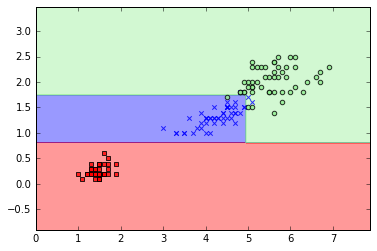

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
clf = dtree(criterion='entropy', max_depth=3, random_state=0)

clf.fit(X, y)
plot_decision_regions(X, y, classifier = clf)


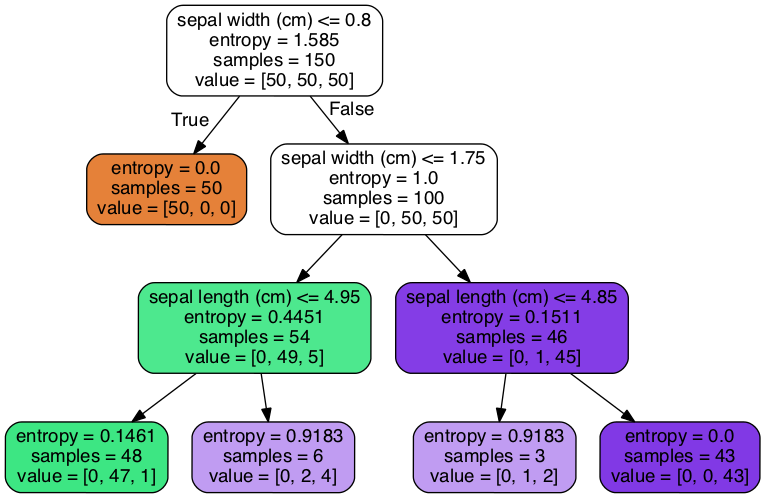

In [23]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
import pydot
from IPython.display import Image

dot_data = StringIO() 
export_graphviz(clf,out_file=dot_data, feature_names = iris.feature_names, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  


# cmd line: dot -Tps tree.dot -o tree.ps @ file loc